En esta libreta se obtiene la participación de los sectores económicos reportados por la tesorería, basado en los datos proveídos al proyecto. Los datos se bajan de un repositorio encriptado que requiere ciertos permisos para poder descargarce. En este sentido, sugerimos substituir las datos en `initial_df` con los datos en control de la tesorería antes de proceder.

In [1]:
import pandas as pd # For creating dataframes and calculating correlation matrices.

import seaborn as sn            # For creating visual representations
import matplotlib.pyplot as plt # of correlation matrices.

from scipy import stats
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import boto3
import pandas as pd


s3 = boto3.client('s3') 

# obj = s3.get_object(Bucket= "proyectomate01", Key="laplace.csv") 

obj = s3.get_object(Bucket= "proyectomate01", Key="laplace_clean.csv") 


In [3]:
initial_df = pd.read_csv(obj['Body'])

/var/folders/1d/nrx88sbx37qdy3x76g9yk83r0000gn/T/ipykernel_52951/2802406361.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_df = pd.read_csv(obj['Body'])


In [4]:
print(initial_df)

            V1      V6_new       V9   V5 V11        V7 V12  V14  V15  V10  \
0            7  2017-03-01  1071401  0.0   0   19000.0   M    3    4    1   
1            7  2017-09-01  1071401  0.0   0   20000.0   M    3    4    1   
2            8  2015-01-01  1071401  0.0   0   83000.0   M    3    4    1   
3            8  2015-02-01  1071401  0.0   0   39000.0   M    3    4    1   
4            8  2015-03-01  1071401  0.0   0  160000.0   M    3    4    1   
...        ...         ...      ...  ...  ..       ...  ..  ...  ...  ...   
2698558  56659  2022-06-01  1071401  0.0   0    1000.0   M    6   10    1   
2698559  56660  2022-07-01  1071411  0.0   0       0.0   M    5    8    2   
2698560  56660  2022-08-01  1071411  0.0   0       0.0   M    5    8    2   
2698561  56660  2022-09-01  1071411  0.0   0       0.0   M    5    8    2   
2698562  56660  2022-10-01  1071411  0.0   0       0.0   M    5    8    2   

         V13  pago_year        V3        V4         V8 fecha_primer_pago  \

# Participación por sector económico en V15

In [5]:
years=sorted(initial_df['pago_year'].unique())
sectores=[str(s) for s in sorted(initial_df['V15'].unique())]

porcentajes_sector=pd.DataFrame(columns=['Año']+sectores)
porcentajes_sector['Año']=years

for y in years:
    total_year=sum(initial_df.loc[(initial_df['pago_year']==y)]['V8'].values)
    for sec in sectores:
        
        sec_val=sum(initial_df.loc[(initial_df['V15']==int(sec))&(initial_df['pago_year']==y)]['V8'].values)
        
        if total_year!=0:
            porcentaje=sec_val/total_year
        else:
#             print(y)
            porcentaje=0
            
        porcentajes_sector.loc[porcentajes_sector['Año']==y,sec]=porcentaje
        

porcentajes_sector


,Año,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1991,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
porcentajes_sector.to_csv('porcentajes_sector_nomina.csv')

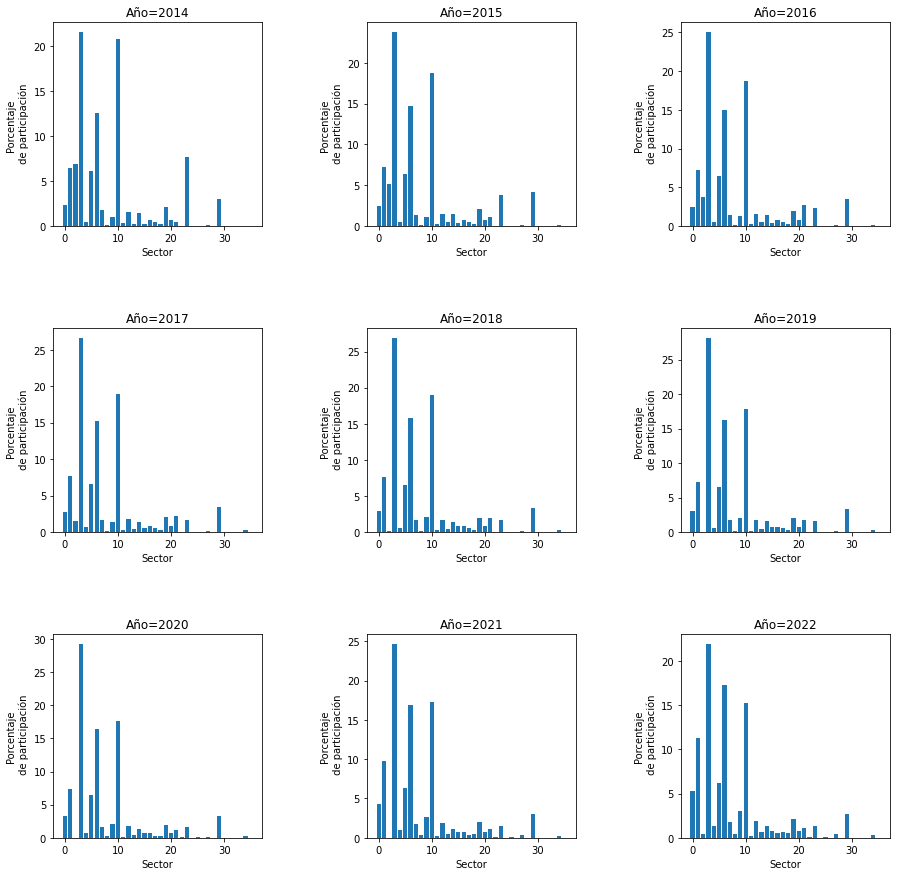

In [11]:
fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 0.5, wspace=0.5)

axs = axs.ravel()

for (i,y) in enumerate(years[24:]):
    df_year=porcentajes_sector.loc[porcentajes_sector['Año']==y]
    
#     n = 5  # Number of columns to retrieve

#     # Get the column names with the n greatest values
#     top_columns = df_year.nlargest(n).index.tolist()
    
    
    axs[i].bar(np.arange(len(sectores)),df_year[sectores].values[0]*100)
        
#     axs[i].set_title('Porcentaje de participación impuesto de nómina \n Año='+str(y))
    axs[i].set_title('Año='+str(y))
    
    axs[i].set_xlabel('Sector')
    
    axs[i].set_ylabel('Porcentaje \n de participación')
    


In [13]:
## V15
tesoreria_v15 = {   1: 'Comercio al por Menor',
                    2: 'Comercio al por Mayor',
                    3: 'NA',
                    4: 'Servicios Profesionales, Técnicos, Especializados y Personales',
                    5: 'Servicios de Alquiler y Administración de Bienes inmueble',
                    6: 'Servicios Educativos, Investigación, Médicos y de Asistencia social y de Asociaciones Civil y Religiosas',
                    7: 'Servicios Financieros, de Seguros y Fianzas',
                    8: 'Construcción',
                    9: 'Servicios de Reparación y Mantenimiento',
                    10: 'Servicios de Comunicaciones',
                    11: 'Servicios de Administración Pública, Defensa y Saneamiento',
                    12: 'Textiles, Prendas de Vestir e Industria de Cuero',
                    13: 'Transportes',
                    14: 'Restaurantes',
                    15: 'Servicios de Esparcimiento, Culturales, Recreativos y Deportivos',
                    16: 'Hoteles',
                    17: 'Papel y Productos de Papel, Imprentas y Editoriales',
                    18: 'Servicios de Alquiler y Administración de Bienes Inmueble',
                    19: 'Productos Alimenticios, Bebidas y Tabacos',
                    20: 'Otras Industrias Manufactureras',
                    21: 'Servicios Relacionados con la Agricultura, Ganadería, Construcción, Transportes, Financieros y Comercio',
                    22: 'Sustancias Químicas, Productos derivados del Petroleo, carbón, hule y plástico',
                    23: 'Industria de la Madera y Productos de la Madera',
                    24: 'Electricidad',
                    25: 'Captación, Potabilización y Distribución de Agua',
                    26: 'Agricultura, Ganadería y Caza',
                    27: 'Industrias Metálicas Básicas',
                    28: 'Productos Metálicos, Maquinaria y Equipo',
                    29: 'Carbón',
                    30: 'Petroleo y Gas Natural',
                    31: 'Pesca',
                    32: 'Productos Minerales no Metálicos, Excepto derivados del petroleo',
                    33: 'Extracción de Materiales Metálicos',
                    34: 'Extracción de Minerales no Metálicos',
                    35: 'Servicios de Organismos Internacionales',
                    36: 'Silvicultura'
                    }

2014 [ 4 11  7 24  3  2] [0.21533369 0.20726422 0.12614956 0.07653813 0.06898004 0.06416833] ['Servicios Profesionales, Técnicos, Especializados y Personales', 'Servicios de Administración Pública, Defensa y Saneamiento', 'Servicios Financieros, de Seguros y Fianzas', 'Electricidad', 'NA', 'Comercio al por Mayor']
2015 [ 4 11  7  2  6  3] [0.23745809 0.18787747 0.14729371 0.07190703 0.06397448 0.05227603] ['Servicios Profesionales, Técnicos, Especializados y Personales', 'Servicios de Administración Pública, Defensa y Saneamiento', 'Servicios Financieros, de Seguros y Fianzas', 'Comercio al por Mayor', 'Servicios Educativos, Investigación, Médicos y de Asistencia social y de Asociaciones Civil y Religiosas', 'NA']
2016 [ 4 11  7  2  6  3] [0.25026715 0.18670637 0.14943499 0.0729893  0.06511535 0.03830274] ['Servicios Profesionales, Técnicos, Especializados y Personales', 'Servicios de Administración Pública, Defensa y Saneamiento', 'Servicios Financieros, de Seguros y Fianzas', 'Comerc

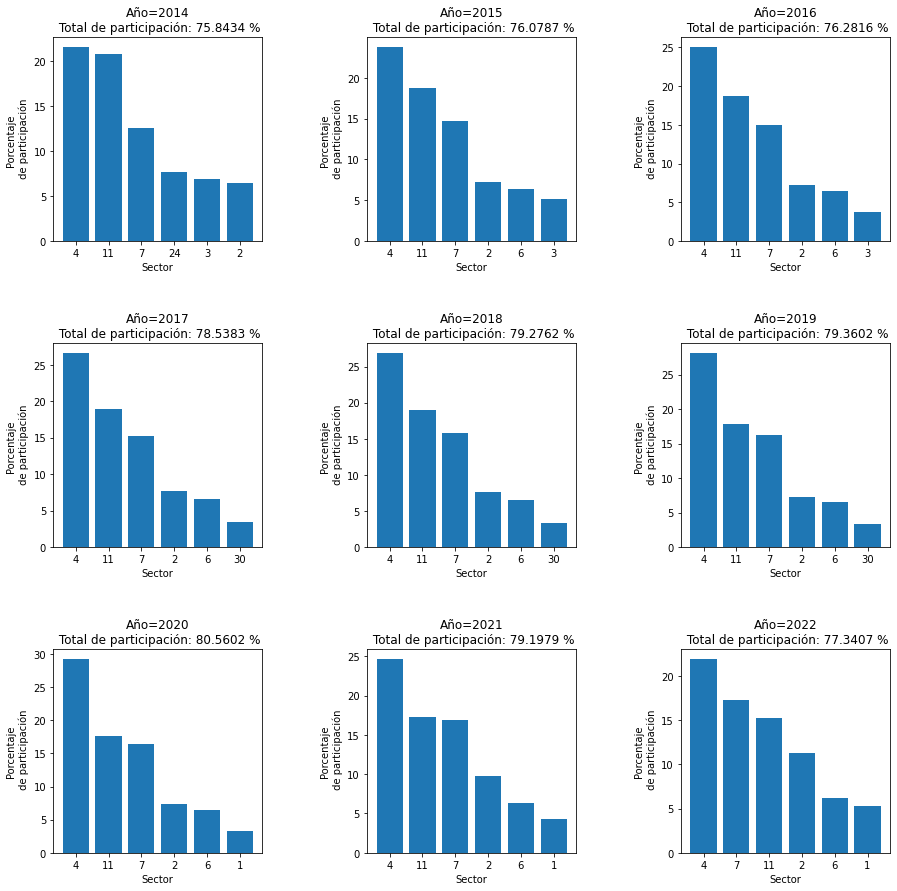

In [22]:
fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 0.5, wspace=0.5)

axs = axs.ravel()

for (i,y) in enumerate(years[24:]):
    df_year=porcentajes_sector.loc[porcentajes_sector['Año']==y]
    
    my_array = df_year[sectores].values[0]
    n = 6  # Number of maximum values

    indices = np.array(sorted(range(len(my_array)), key=lambda i: my_array[i], reverse=True)[:n])+1
    
    sorted_array = sorted(my_array, reverse=True)
    
    max_values = np.array(sorted_array[:n])
    
    axs[i].bar(np.arange(len(indices)),max_values*100)
        
    axs[i].set_title('Año='+str(y)+f'\n Total de participación: {sum(max_values)*100:0.4f} %')
    
    axs[i].set_xlabel('Sector')
    
    axs[i].set_ylabel('Porcentaje \n de participación')
    
    axs[i].set_xticks(np.arange(len(indices)),indices)

    print(y,indices,max_values,[tesoreria_v15[ind] for ind in indices])

In [20]:
[var for var in list(initial_df.columns) if var.startswith('V')]

['V1',
 'V6_new',
 'V9',
 'V5',
 'V11',
 'V7',
 'V12',
 'V14',
 'V15',
 'V10',
 'V13',
 'V3',
 'V4',
 'V8']

In [21]:
years=sorted(initial_df['pago_year'].unique())

y=years[24]
# initial_df.loc[initial_df['pago_year']==y][['V1','V3']]
# initial_df.loc[initial_df['pago_year']==y][['V1'],['V3'],['V4'],['V5'],['V9'],['V10'],['V11'],['V12'],['V13'],['V14'],['V15']]
initial_df.loc[initial_df['pago_year']==y][['V1',
                                         'V9',
                                         'V5',
                                         'V11',
                                         'V7',
                                         'V12',
                                         'V14',
                                         'V15',
                                         'V10',
                                         'V13',
                                         'V3',
                                         'V4',
                                         'V8']]


,V1,V9,V5,V11,V7,V12,V14,V15,V10,V13,V3,V4,V8
40,53,1071401,0.0,0,183000.0,M,3,4,1,1,21.51987,215198.7,2151987.0
80,61,1078007,0.0,0,15000.0,M,1,1,3,1,1.77333,591110.0,177333.0
82,63,1071401,0.0,0,142000.0,M,2,3,1,1,16.74969,167496.9,1674969.0
101,81,1071401,0.0,0,2083000.0,M,3,6,1,1,3217.58445,32175844.5,321758445.0
120,104,1071401,0.0,0,107000.0,M,1,2,1,1,30.57558,305755.8,3058709.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070011,56540,1071411,0.0,0,0.0,F,7,17,2,1,0.00000,0.0,0.0
1070012,56540,1071411,0.0,0,0.0,F,7,17,2,1,0.00000,0.0,0.0
1070013,56540,1071411,0.0,0,0.0,F,7,17,2,1,0.00000,0.0,0.0
1070014,56540,1071411,0.0,0,0.0,F,7,17,2,1,0.00000,0.0,0.0


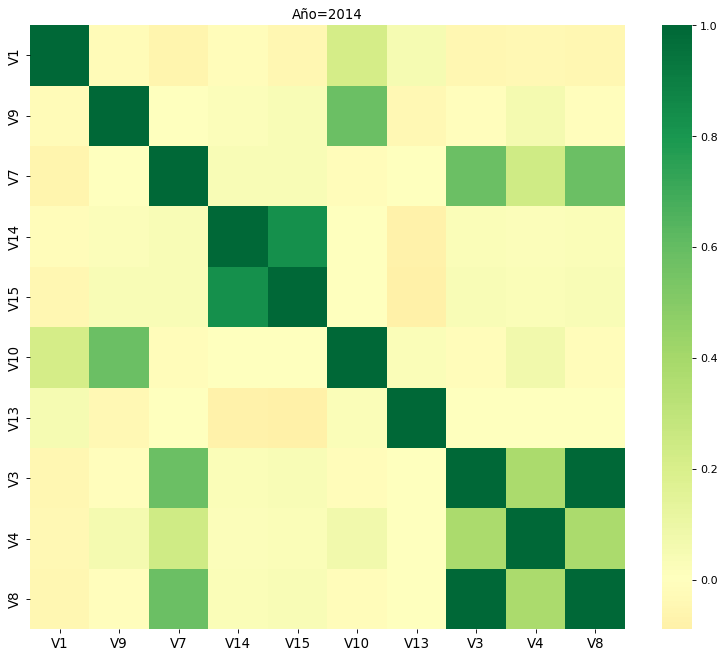

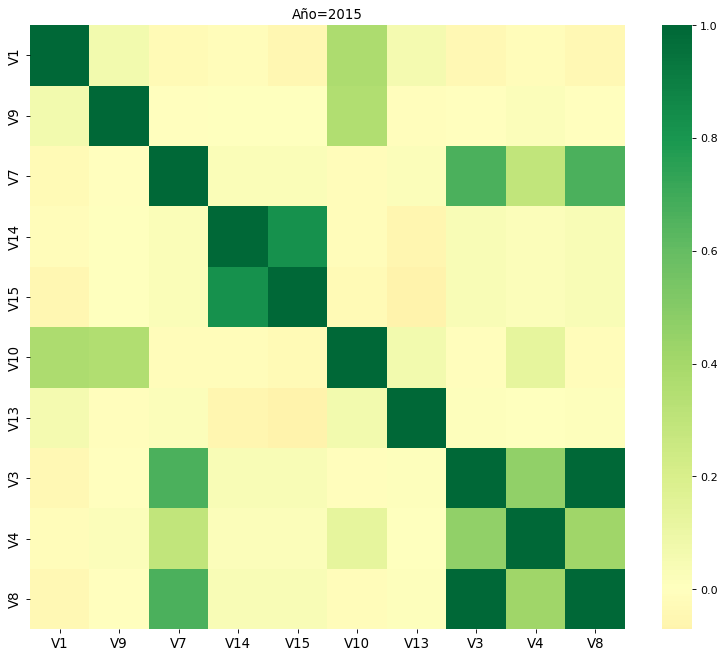

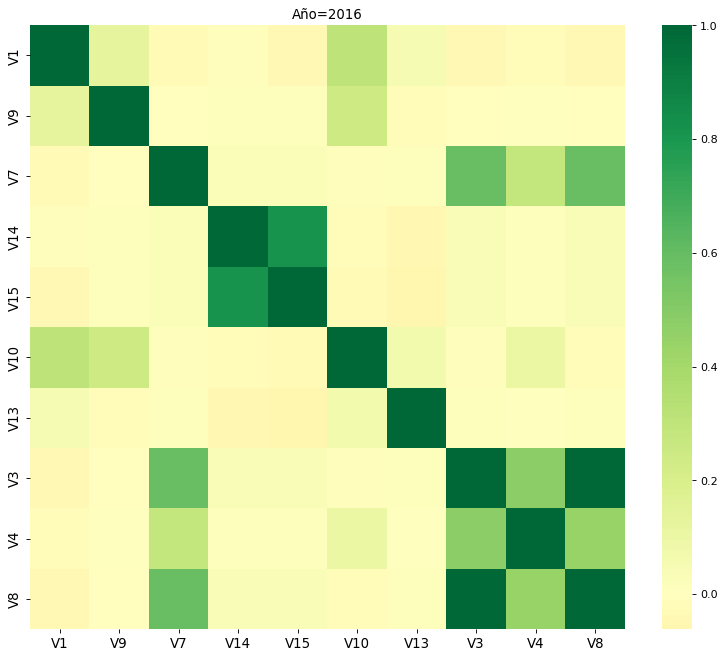

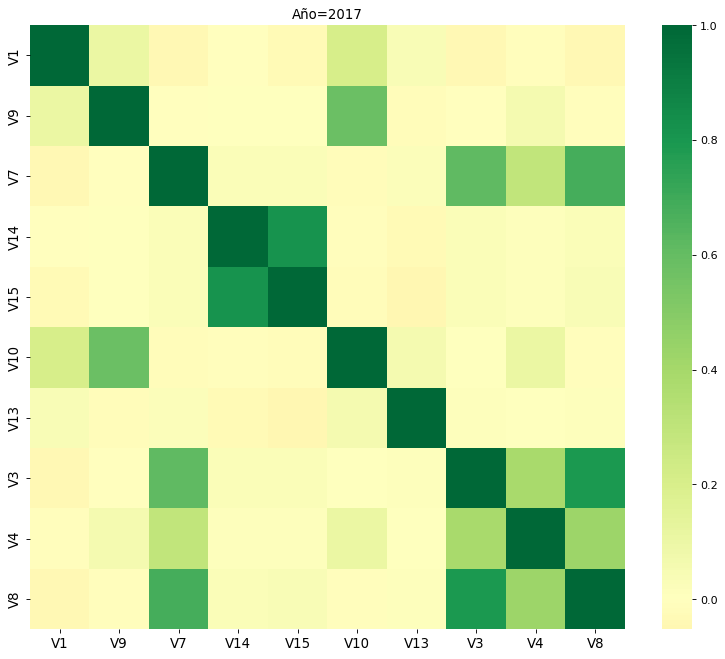

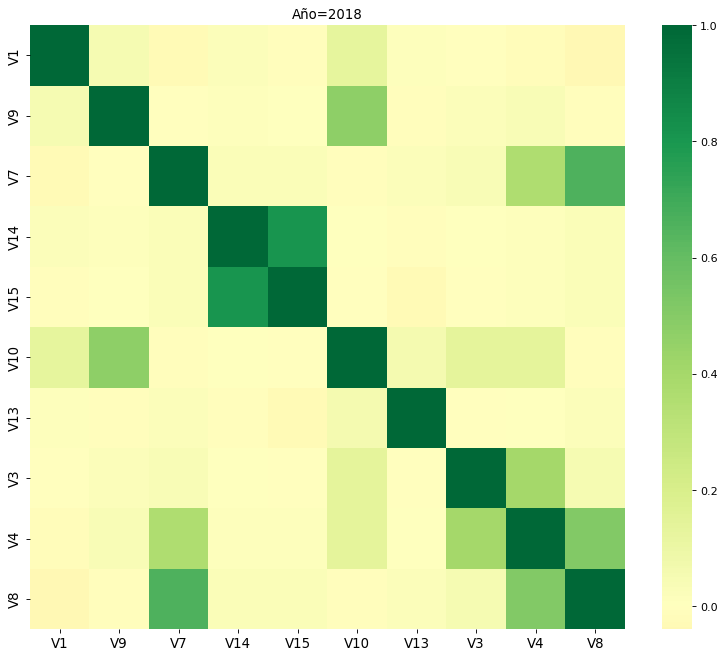

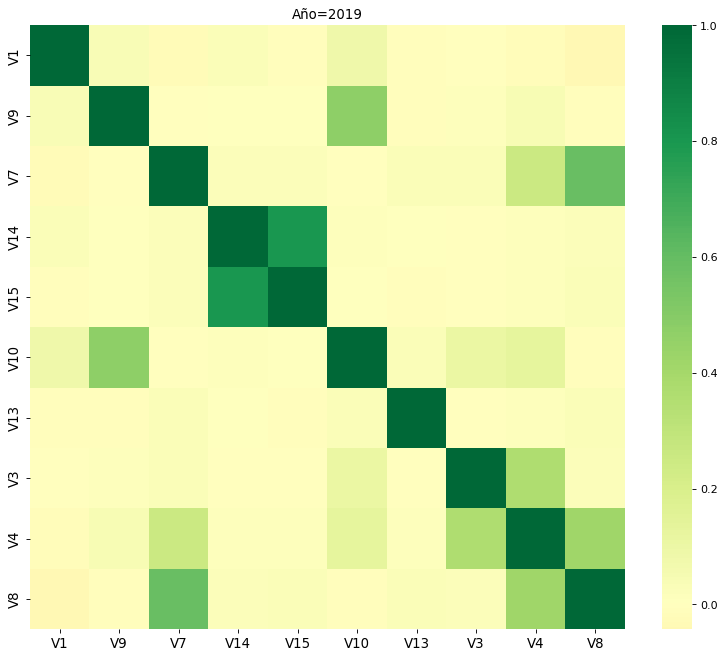

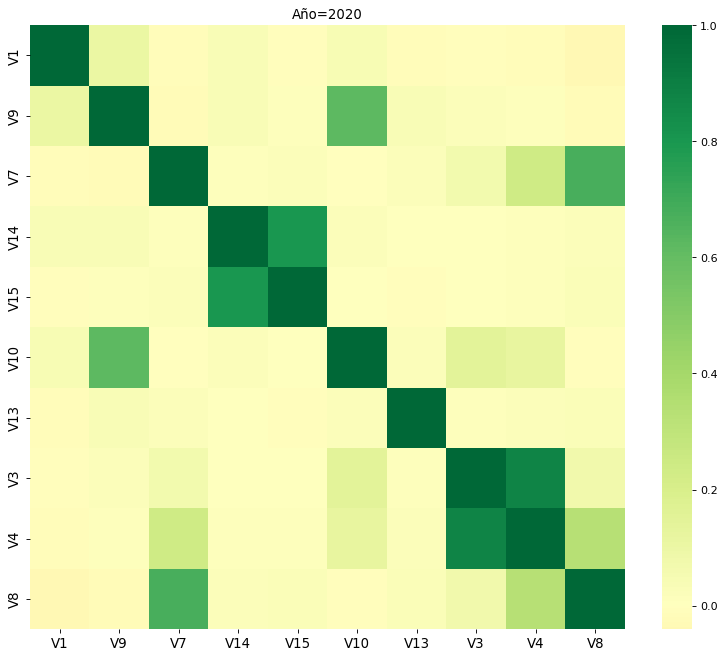

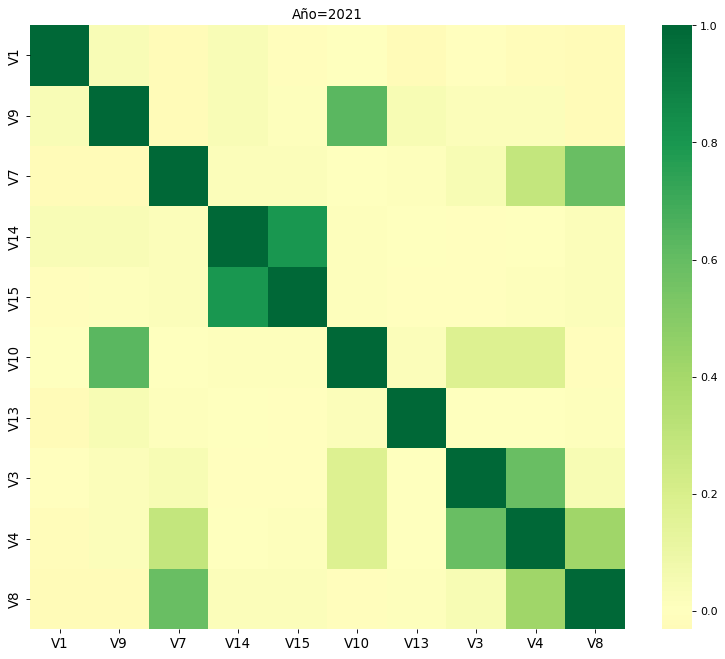

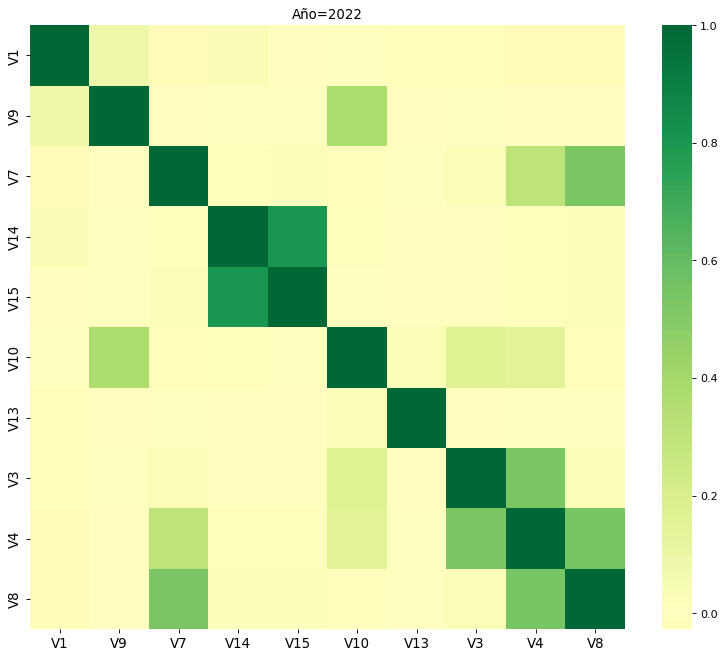

In [23]:
for y in years[24:]:
    df_year=initial_df.loc[initial_df['pago_year']==y][['V1',
                                         'V9',
                                         'V11',
                                         'V7',
                                         'V12',
                                         'V14',
                                         'V15',
                                         'V10',
                                         'V13',
                                         'V3',
                                         'V4',
                                         'V8']]
#     for sec in sectores:
#         df_sector=df_year.loc[df_year['V15']==sec]
    # Plot
    plt.figure(figsize=(12,10), dpi= 80)
    sn.heatmap(df_year.select_dtypes(include=[int, float]).corr(), xticklabels=df_year.corr().columns,
               yticklabels=df_year.corr().columns, cmap='RdYlGn', center=0)#, annot=True)

    # Decorations
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Año='+str(y))
    plt.show()
        

In [25]:
# for year in years[24:]:
#     print(year)
#     df_year=initial_df.loc[initial_df['pago_year']==year]
#     for sec in sectores:
#         print(year,sec)
#         df_sector=df_year.loc[df_year['V15']==sec]
        
#         df_sector = df_sector.drop('V15', axis=1)

#         # Plot
#         plt.figure(figsize=(12,10), dpi= 80)
#         sn.heatmap(df_sector.select_dtypes(include=[int, float]).corr(), xticklabels=df_sector.corr().columns,
#                    yticklabels=df_sector.corr().columns, cmap='RdYlGn', center=0)#, annot=True)

#         # Decorations
#         plt.xticks(fontsize=12)
#         plt.yticks(fontsize=12)
#         plt.title('Año='+str(y)+', Sector='+str(sec))
#         plt.show()